In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from get_data import get_weather_data, get_dengue_data, get_trap_data

# Importando dados

In [2]:
df_trap = get_trap_data()

df_trap.head()

Não há valores nulos em trapped


,tt_dep_aa,m_aaeg_m_m,m_aaeg_m_v,m_aaeg_f_m,m_aaeg_f_v,n_traps,trapped
date,,,,,,,
2017-01-01,111,27,49,314,127,2538,441
2017-03-01,122,22,27,363,72,2605,435
2017-05-01,92,12,11,272,64,2496,336
2017-07-01,18,4,6,261,51,2607,312
2017-09-01,29,10,2,242,31,2766,273


In [3]:
df_trap.tail(7)

,tt_dep_aa,m_aaeg_m_m,m_aaeg_m_v,m_aaeg_f_m,m_aaeg_f_v,n_traps,trapped
date,,,,,,,
2021-11-01,97,17,3,740,58,2349,798
2022-01-01,9,1,5,353,56,1004,409
2022-03-01,207,22,13,613,44,5021,657
2022-05-01,284,12,8,1097,68,5071,1165
2022-07-01,0,1,0,17,0,263,17
2022-09-01,38,4,0,392,10,4937,402
2022-11-01,71,4,0,306,11,4893,317


Dados climáticos:

In [4]:
df_we = get_weather_data()

df_we.head()

,daily_precipitation-mm,temp_max-celsius,temp_min-celsius,temp_mean-celsius,mean_relative_humidity-%,mean_wind_speed-m_per_s
Data,,,,,,
2010-01-01,0.0,31.1,23.9,26.7,72.1,1.7
2010-01-02,2.2,32.9,23.8,27.2,75.3,1.3
2010-01-03,0.0,32.3,25.6,28.4,73.2,1.7
2010-01-04,1.6,33.9,24.6,28.5,75.5,2.5
2010-01-05,0.2,35.2,25.5,29.5,69.1,2.6


Dados de incidência:

In [5]:
df_inc = get_dengue_data() #já vem com a média móvel  de 7 dias aqui...

df_inc.head()

,notified,probable,lab_confirmed,acum_notified,acum_probable,acum_lab_confirmed
dt_sin_pri,,,,,,
2010-01-07,1.571429,0.857143,0.285714,4.714286,2.714286,1.142857
2010-01-08,1.857143,1.000000,0.142857,6.571429,3.714286,1.285714
2010-01-09,1.857143,1.000000,0.142857,8.428571,4.714286,1.428571
2010-01-10,2.000000,1.142857,0.142857,10.428571,5.857143,1.571429
2010-01-11,1.714286,0.857143,0.142857,12.142857,6.714286,1.714286


 # Gráfico 1 - mosquitos e temperatura 2017-2022

In [7]:
ini_date = '2017-01-01'
end_date = '2021-11-01'

C:\Users\Caio\AppData\Local\Temp\ipykernel_13956\86261111.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_w['temp_mean-celsius'] = df_w['temp_mean-celsius'].rolling(14).mean()


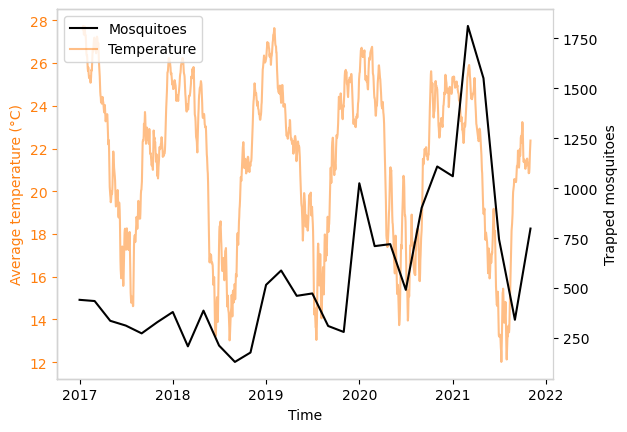

In [14]:
def plot_vs_temp(ax, ini_date, end_date):
    twin1 = ax.twinx()

    #ax3 = ax.twinx()
    
    df_m = df_trap.loc[ini_date:end_date] # casos de mosquito

    #df_d = df_inc.loc[ini_date:end_date] # casos de dengue 

    df_w = df_we.loc[ini_date: end_date] # casos climáticos 

    #moving average
    df_w['temp_mean-celsius'] = df_w['temp_mean-celsius'].rolling(14).mean()

    # plot da temperatura
    p3, = ax.plot(df_w['temp_mean-celsius'], label = 'Temperature', color = 'tab:orange', alpha = 0.5)

    # Plot dos mosquitos
    p2, = twin1.plot(df_m.trapped, label = 'Mosquitoes', color = 'black')

    # Plot dos casos
    #p1, = ax3.plot(df_d.notified, label = 'Cases', color = 'tab:red')

    #ax3.yaxis.tick_left()

    #ax3.yaxis.set_label_position("left")



    # Editando TEMPERATURA
    #ax.spines.right.set_position(("axes", 1.2))
    #ax.yaxis.tick_right()
    #ax.yaxis.set_label_position("right")
    ax.set_ylabel('Average temperature (°C)')  
    
    ax.yaxis.label.set_color(p3.get_color())

    ax.tick_params(axis='y', colors=p3.get_color())

    ax.legend(handles=[ p2, p3], loc = 2)

    ax.spines['right'].set_color('lightgray')

    # Editando MOSQUITOS
    #twin1.spines['left'].set_position(("axes", 1.2))
    #twin1.yaxis.set_label_position("left")
    #twin1.spines.left.set_position(("axes", 1.2))

    twin1.set_ylabel('Trapped mosquitoes')

    twin1.yaxis.label.set_color(p2.get_color())

    twin1.tick_params(axis='y', colors=p2.get_color())

    # Define a cor dos contornos 
    twin1.spines['bottom'].set_color('lightgray')
    twin1.spines['top'].set_color('lightgray')
    twin1.spines['right'].set_color('lightgray')
    twin1.spines['left'].set_color('lightgray')

    # Editando CASOS DENGUE
    #ax3.set_ylabel('Notified cases')
    #ax3.yaxis.label.set_color(p1.get_color())
    #ax3.tick_params(axis='y', colors=p1.get_color())

    #ax.legend(handles=[p1, p2, p3], loc = 2)
    ax.set_xlabel('Time')
    
   #ax.grid()

    #ax.set_title('Data on mosquitoes and temperature')

################################
fig, ax =plt.subplots()

plot_vs_temp(ax, ini_date, end_date)

plt.savefig('curves_vs_temp.png', bbox_inches = 'tight', dpi = 600)

plt.show()

 # Gráfico 2 - mosquitos e chuva 2017-2022

C:\Users\Caio\AppData\Local\Temp\ipykernel_13956\3167887996.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_w['daily_precipitation-mm'] = df_w['daily_precipitation-mm'].rolling(21).mean()


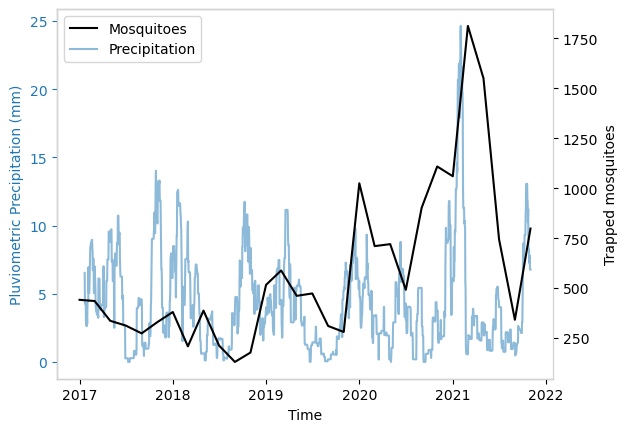

In [13]:
def plot_vs_rain(ax, ini_date, end_date):
    ax2 = ax.twinx()

    #ax3 = ax.twinx()
    
    df_m = df_trap.loc[ini_date:end_date] # casos de mosquito

    #df_d = df_inc.loc[ini_date:end_date] # casos de dengue 

    df_w = df_we.loc[ini_date: end_date] # casos climáticos 

    #moving average
    df_w['daily_precipitation-mm'] = df_w['daily_precipitation-mm'].rolling(21).mean()


    p3, = ax.plot(df_w['daily_precipitation-mm'], label = 'Precipitation', color = 'tab:blue', alpha = 0.5)

    p2, = ax2.plot(df_m.trapped, label = 'Mosquitoes', color = 'black')

    #p1, = ax3.plot(df_d.notified, label = 'Cases', color = 'tab:red')

    #ax3.yaxis.tick_left()

    #ax3.yaxis.set_label_position("left")


    #ax.spines.right.set_position(("axes", 1.2))

    #ax.yaxis.tick_right()

    #ax.yaxis.set_label_position("right")

    ax2.set_ylabel('Trapped mosquitoes')
    
    #ax3.set_ylabel('Notified cases')

    ax.set_ylabel('Pluviometric Precipitation (mm)')

    ax.yaxis.label.set_color(p3.get_color())
    ax2.yaxis.label.set_color(p2.get_color())
    #ax3.yaxis.label.set_color(p1.get_color())

    ax.tick_params(axis='y', colors=p3.get_color())
    ax2.tick_params(axis='y', colors=p2.get_color())
    #ax3.tick_params(axis='y', colors=p1.get_color())

    ax.legend(handles=[p2, p3], loc = 2)

    ax2.spines['bottom'].set_color('lightgray')
    ax2.spines['top'].set_color('lightgray')
    ax2.spines['right'].set_color('lightgray')
    ax2.spines['left'].set_color('lightgray')
    
    ax.spines['right'].set_color('lightgray')

    ax.set_xlabel('Time')
    #ax.grid()


    #ax.set_title('Data on mosquitoes and precipitation')

###############################################################
fig, ax =plt.subplots()

plot_vs_rain(ax, ini_date, end_date)

plt.savefig('fig4b - curves_vs_rain.png', bbox_inches = 'tight', dpi = 600)

plt.show()

# Gráfico 3 - Só casos de 2010-2022

In [6]:
casos_sem_media = get_dengue_data(mean=False)

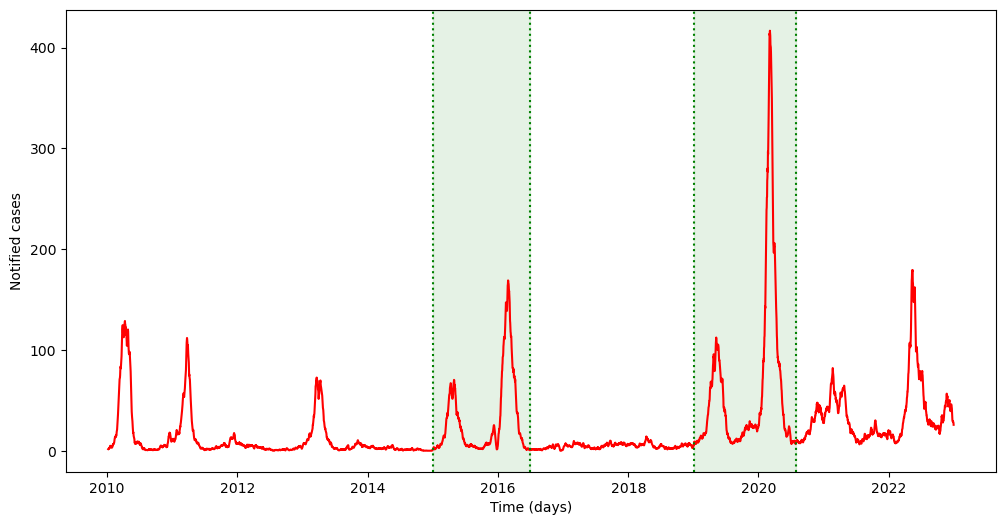

In [8]:
import datetime as dt
plt.figure(figsize=(12,6))

plt.plot(df_inc.notified, color='red')
#plt.plot(casos_sem_media.notified, color='black')


# Periodo de fitting 2015-2016
plt.axvline(dt.datetime(2015, 1, 1), ls=':', color ='green')
plt.axvline(dt.datetime(2016, 7, 1), ls=':', color ='green')

#periodo de fitting 2019-2020
plt.axvline(dt.datetime(2019, 1, 6), ls=':', color ='green')
plt.axvline(dt.datetime(2020, 8, 1), ls=':', color ='green')

# Fazendo as áreas entre as linhas ficarem pintadas
plt.axvspan(dt.datetime(2019, 1, 6), dt.datetime(2020, 8, 1), alpha=0.1, color='green')
plt.axvspan(dt.datetime(2015, 1, 1), dt.datetime(2016, 7, 1), alpha=0.1, color='green')


#plt.title('Data on dengue cases data in Foz do Iguaçu')
plt.ylabel('Notified cases')
plt.xlabel('Time (days)')

# salvando o gráfico 
plt.savefig('figure4_cases.png', bbox_inches = 'tight', dpi = 600, format = 'png')

# Gráfico 4 - Casos e mosquito 2017-2022

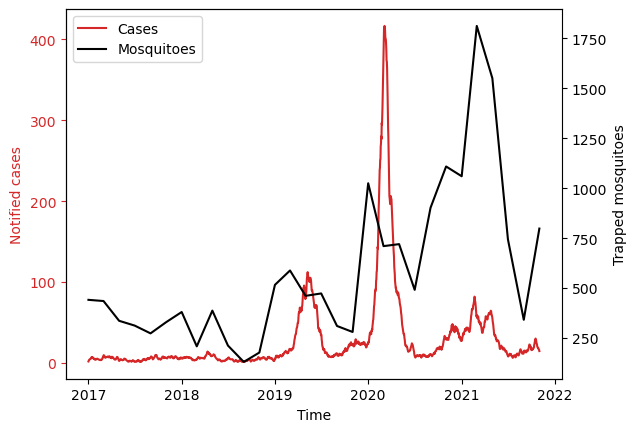

In [10]:
def plot_casos_mosquito(ax, ini_date, end_date):
    twin1 = ax.twinx()

    #ax3 = ax.twinx()
    
    df_m = df_trap.loc[ini_date:end_date] # casos de mosquito

    df_d = df_inc.loc[ini_date:end_date] # casos de dengue 

    #df_w = df_we.loc[ini_date: end_date] # casos climáticos 

    #moving average
    #df_w['temp_mean-celsius'] = df_w['temp_mean-celsius'].rolling(14).mean()

    # plot da temperatura
    #p3, = ax.plot(df_w['temp_mean-celsius'], label = 'Temperature', color = 'tab:orange', alpha = 0.5)

    # Plot dos mosquitos
    p2, = twin1.plot(df_m.trapped, label = 'Mosquitoes', color = 'black')

    # Plot dos casos
    p1, = ax.plot(df_d.notified, label = 'Cases', color = 'tab:red')

    ax.yaxis.tick_left()

    ax.yaxis.set_label_position("left")



    # Editando TEMPERATURA
    #ax.spines.right.set_position(("axes", 1.2))
    #ax.yaxis.tick_right()
    #ax.yaxis.set_label_position("right")
    #ax.set_ylabel('Average temperature (°C)')  
    
    #ax.yaxis.label.set_color(p3.get_color())

    #ax.tick_params(axis='y', colors=p3.get_color())

    #ax.legend(handles=[ p2, p1], loc = 2)

    ax.spines['right'].set_color('lightgray')

    # Editando MOSQUITOS
    #twin1.spines['left'].set_position(("axes", 1.2))
    #twin1.yaxis.set_label_position("left")
    #twin1.spines.left.set_position(("axes", 1.2))

    twin1.set_ylabel('Trapped mosquitoes')

    twin1.yaxis.label.set_color(p2.get_color())

    twin1.tick_params(axis='y', colors=p2.get_color())

    # Define a cor dos contornos 
    #twin1.spines['bottom'].set_color('lightgray')
    #twin1.spines['top'].set_color('lightgray')
    #twin1.spines['right'].set_color('lightgray')
    #twin1.spines['left'].set_color('lightgray')

    # Editando CASOS DENGUE
    ax.set_ylabel('Notified cases')
    ax.set_xlabel('Time')
    ax.yaxis.label.set_color(p1.get_color())
    ax.tick_params(axis='y', colors=p1.get_color())

    ax.legend(handles=[p1, p2], loc = 2)
    
    
   #ax.grid()

    #ax.set_title('Data on mosquitoes and dengue cases')

################################
fig, ax =plt.subplots()

ini_date = '2017-01-01'
end_date = '2021-11-01'

plot_casos_mosquito(ax, ini_date, end_date)

#plt.savefig('curves_vs_temp.png', bbox_inches = 'tight', dpi = 300)

# salvando o gráfico 
plt.savefig('figure4_mosquito_and_cases2017.png', bbox_inches = 'tight',  dpi = 800, format = 'png')

plt.show()

# Fazendo o gráfico 4 insite no 3

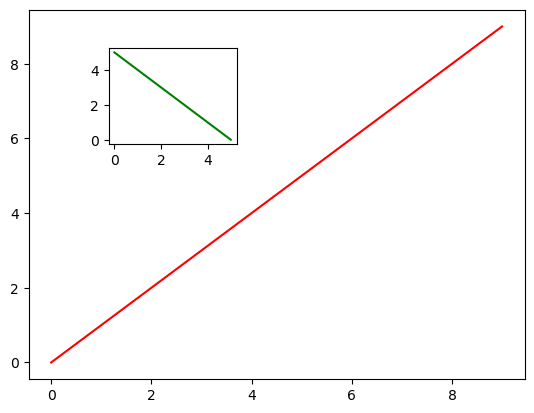

In [3]:
fig, ax1 = plt.subplots()

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.25, 0.6, 0.2, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])

plot_casos_mosquito(ax, ini_date, end_date)

ax1.plot(range(10), color='red')
ax2.plot(range(6)[::-1], color='green')

plt.show()